In [ ]:
# import all packages

import pandas as pd
import numpy as np
from datetime import timedelta, datetime
from mpl_toolkits.mplot3d import axes3d

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.model_selection import train_test_split as tts
import scipy.stats as st

#import xgboost as xgb
from scipy.io import savemat
import plotly.graph_objects as go

import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm import SVC,SVR
from sklearn import datasets
import scipy.stats as stats

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

# import packages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, SimpleRNN, Input, ConvLSTM2D,Conv1D, Conv2D, LSTM,Flatten,Reshape, concatenate, Conv3D,BatchNormalization,Activation
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping as ES
from sklearn.preprocessing import MinMaxScaler
from tsaug.visualization import plot as PLOT
from tqdm import tqdm
from scipy.signal import savgol_filter as sg

In [ ]:
def R2 (true,predicted):
    import numpy as np
    R2 = np.mean((predicted-predicted.mean())*(true-true.mean()))/(np.std(predicted)*np.std(true))
    return R2
def R(true,predicted):
    R = (np.sum((true-true.mean())*(predicted-predicted.mean())))/(np.sqrt((np.sum((true-true.mean())**2))*np.sum((true-true.mean())**2)))
    return R

In [ ]:
df = pd.read_excel("D:\\hassan sharifi\\milad's project\\img\\data.xlsx")
orig_df = df.copy()
df

,index,CGR,NPHI,PEF,RESD,RESX,RHOB,SGR,log(NMR_PERM)
0,0,0.581007,0.187088,0.626319,0.356231,0.292939,0.684603,0.426369,0.144913
1,1,0.490225,0.128213,0.666668,0.442034,0.332189,0.719365,0.352876,0.133279
2,2,0.411140,0.105342,0.695993,0.436939,0.359368,0.733794,0.288896,0.198111
3,3,0.342359,0.101894,0.718780,0.426162,0.370579,0.733531,0.231029,0.272135
4,4,0.312703,0.099486,0.731391,0.446326,0.374364,0.722566,0.204826,0.291435
...,...,...,...,...,...,...,...,...,...
6478,6478,0.249806,0.245387,0.648688,0.382449,0.569494,0.597250,0.231344,0.629230
6479,6479,0.234380,0.259585,0.633787,0.356433,0.544754,0.565176,0.220226,0.640021
6480,6480,0.237015,0.260957,0.616715,0.361464,0.517871,0.540058,0.225041,0.636215
6481,6481,0.223796,0.263455,0.608258,0.366017,0.500587,0.519614,0.213198,0.638169


In [ ]:
target = sg(df.pop('log(NMR_PERM)').values,31,3)
index = df.pop('index')
features = df
del df
features['CGR'] = sg(features['CGR'].values,31,3)
features['NPHI'] = sg(features['NPHI'].values,31,3)
features['PEF'] = sg(features['PEF'].values,31,3)
features['RESD'] = sg(features['RESD'].values,31,3)
features['RESX'] = sg(features['RESX'].values,31,3)
features['RHOB'] = sg(features['RHOB'].values,31,3)
features['SGR'] = sg(features['SGR'].values,31,3)
features

,CGR,NPHI,PEF,RESD,RESX,RHOB,SGR
0,0.422314,0.089388,0.701116,0.463890,0.344949,0.721715,0.273197
1,0.417234,0.100637,0.695817,0.446116,0.350255,0.718646,0.278621
2,0.412062,0.111344,0.690718,0.431299,0.354144,0.715723,0.283397
3,0.406783,0.121512,0.685840,0.419274,0.356746,0.712910,0.287509
4,0.401384,0.131144,0.681200,0.409874,0.358193,0.710170,0.290942
...,...,...,...,...,...,...,...
6478,0.179884,0.175314,0.675866,0.430108,0.622806,0.601049,0.152412
6479,0.198092,0.204154,0.655200,0.408398,0.589309,0.580950,0.172452
6480,0.223388,0.242235,0.627734,0.379902,0.543469,0.555809,0.201851
6481,0.256385,0.290385,0.592900,0.344073,0.484205,0.525184,0.241474


In [ ]:
Faetures = features.values.reshape(features.shape[0],features.shape[1],1)
Target = target.reshape(-1,1)

<AxesSubplot:>

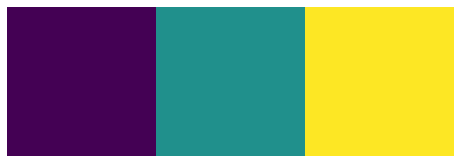

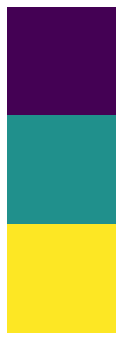

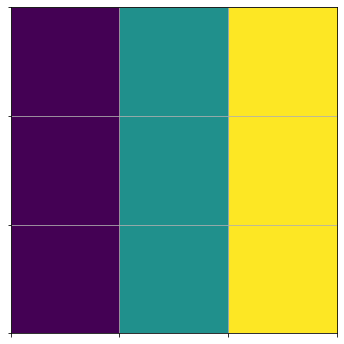

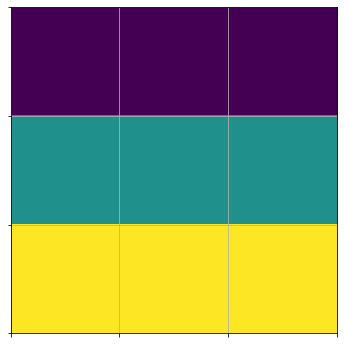

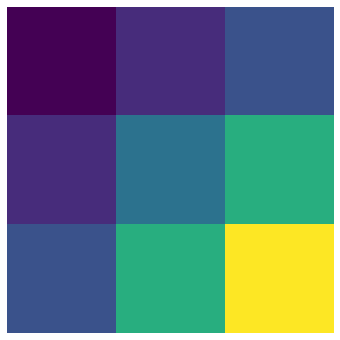

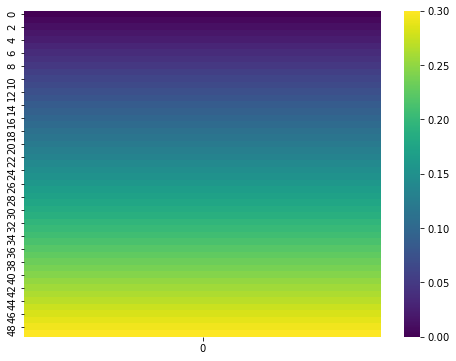

In [ ]:
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt

a = np.array([1,2,3]).reshape(1,3)
b = a
plt.imshow(a)
plt.axis('off')
plt.figure()
plt.imshow(b.reshape(3,1))
plt.axis('off')

A,B = np.meshgrid(a,b)
plt.figure()
plt.imshow(A)
plt.yticks([-.5,.5,1.5,2.5],['','','',''])
plt.xticks([-.5,.5,1.5,2.5],['','','',''])
plt.grid()

plt.figure()
plt.imshow(B)
plt.yticks([-.5,.5,1.5,2.5],['','','',''])
plt.xticks([-.5,.5,1.5,2.5],['','','',''])

plt.grid()


Z = A*B
#Z = np.c_[Z,np.array([.3,.3,.3]).reshape(-1,1)]
f = plt.figure()
ax = plt.imshow(Z)
plt.axis('off')
plt.colorbar(ax)
#plt.yticks([-.5,.5,1.5,2.5])
#plt.xticks([-.5,.5,1.5,2.5])
#plt.grid()

cbar = np.linspace(1,9,50)
cbar = cbar.reshape(-1,1)
plt.figure()
sn.heatmap(cbar,cmap='viridis')

In [ ]:
np.linspace(0,.3,50)

array([0.        , 0.00612245, 0.0122449 , 0.01836735, 0.0244898 ,
       0.03061224, 0.03673469, 0.04285714, 0.04897959, 0.05510204,
       0.06122449, 0.06734694, 0.07346939, 0.07959184, 0.08571429,
       0.09183673, 0.09795918, 0.10408163, 0.11020408, 0.11632653,
       0.12244898, 0.12857143, 0.13469388, 0.14081633, 0.14693878,
       0.15306122, 0.15918367, 0.16530612, 0.17142857, 0.17755102,
       0.18367347, 0.18979592, 0.19591837, 0.20204082, 0.20816327,
       0.21428571, 0.22040816, 0.22653061, 0.23265306, 0.23877551,
       0.24489796, 0.25102041, 0.25714286, 0.26326531, 0.26938776,
       0.2755102 , 0.28163265, 0.2877551 , 0.29387755, 0.3       ])

# Image Generation

**No.1**

In [ ]:
feat_num = Faetures.reshape(Faetures.shape[0],Faetures.shape[1],1)
print(feat_num.shape)

(6483, 7, 1)


(6483, 7, 7, 1)


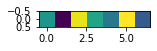

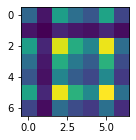

In [ ]:
feat_img = []
A_list = []
B_list = []
for i in feat_num:
    A,B = np.meshgrid(i,i)
    Z = A*B
    Z = Z.reshape(Z.shape[0],Z.shape[1],1)
    feat_img.append(Z)
    A_list.append(A)
    B_list.append(B)
feat_img = np.array(feat_img)
plt.figure(figsize=(2,2))
plt.imshow(feat_num[0].reshape(1,feat_num[0].shape[0]))
plt.figure(figsize=(2,2))
plt.imshow(feat_img[0]);
print(feat_img.shape)
shape = feat_img[0].shape

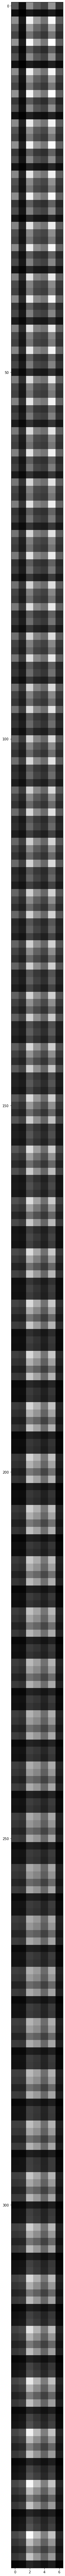

In [ ]:
a = feat_img[0].reshape(7,7)
b = feat_img[1].reshape(7,7)
c = np.r_[a,b]
for i in range (2,50):
    c = np.r_[c,feat_img[i].reshape(7,7)]
plt.figure(figsize=(140,140))
plt.imshow(c.reshape(c.shape[0],c.shape[1],1),'gray');

<ipython-input-529-90a37329b8f6>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(bb)
<ipython-input-529-90a37329b8f6>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_yticklabels(bb)
<ipython-input-529-90a37329b8f6>:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[3].set_yticklabels(bb)
<ipython-input-529-90a37329b8f6>:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[4].set_yticklabels(bb)
<ipython-input-529-90a37329b8f6>:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[5].set_yticklabels(bb)
<ipython-input-529-90a37329b8f6>:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[6].set_yticklabels(bb)


(-0.5, 6.5, 6482.5, -0.5)

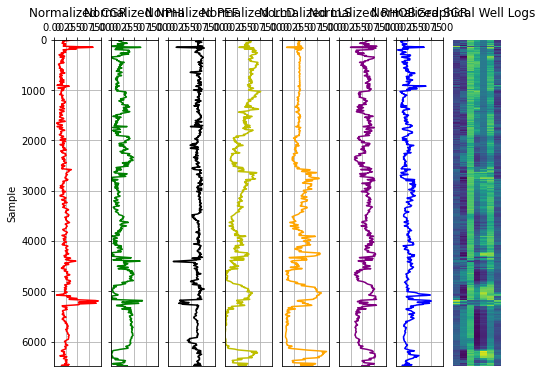

In [ ]:
fig, ax = plt.subplots(1, 8)

ax[0].plot(features['CGR'],range(len(features['CGR'])),'r')
ax[0].xaxis.tick_top()
ax[0].set_title('Normalized CGR')
ax[0].set_ylabel('Sample')
ax[0].grid()
ax[0].invert_yaxis()
ax[0].set_ylim(6483,0)
ax[0].set_xlim(0,1)
ax[0].set_xticks([0,0.25,0.5,.75,1])
b = ax[0].get_yticks()
bb = []
for i in b:
    bb.append('')


ax[1].plot(features['NPHI'],range(len(features['CGR'])),'g')
ax[1].xaxis.tick_top()
ax[1].set_title('Normalized NPHI')
ax[1].grid()
ax[1].invert_yaxis()
ax[1].set_ylim(6483,0)
ax[1].set_xlim(0,1)
ax[1].set_xticks([0,0.25,0.5,.75,1])
ax[1].set_yticklabels(bb)


ax[2].plot(features['PEF'],range(len(features['CGR'])),'k')
ax[2].xaxis.tick_top()
ax[2].set_title('Normalized PEF')
ax[2].grid()
ax[2].invert_yaxis()
ax[2].set_ylim(6483,0)
ax[2].set_xlim(0,1)
ax[2].set_xticks([0,0.25,0.5,.75,1])
ax[2].set_yticklabels(bb)


ax[3].plot(features['RESD'],range(len(features['CGR'])),'y')
ax[3].xaxis.tick_top()
ax[3].set_title('Normalized LLD')
ax[3].grid()
ax[3].invert_yaxis()
ax[3].set_ylim(6483,0)
ax[3].set_xlim(0,1)
ax[3].set_xticks([0,0.25,0.5,.75,1])
ax[3].set_yticklabels(bb)


ax[4].plot(features['RESX'],range(len(features['CGR'])),'orange')
ax[4].xaxis.tick_top()
ax[4].set_title('Normalized LLS')
ax[4].grid()
ax[4].invert_yaxis()
ax[4].set_ylim(6483,0)
ax[4].set_xlim(0,1)
ax[4].set_xticks([0,0.25,0.5,.75,1])
ax[4].set_yticklabels(bb)

ax[5].plot(features['RHOB'],range(len(features['CGR'])),'purple')
ax[5].xaxis.tick_top()
ax[5].set_title('Normalized RHOB')
ax[5].grid()
ax[5].invert_yaxis()
ax[5].set_ylim(6483,0)
ax[5].set_xlim(0,1)
ax[5].set_xticks([0,0.25,0.5,.75,1])
ax[5].set_yticklabels(bb)

ax[6].plot(features['SGR'],range(len(features['CGR'])),'b')
ax[6].xaxis.tick_top()
ax[6].set_title('Normalized SGR')
ax[6].grid()
ax[6].invert_yaxis()
ax[6].set_ylim(6483,0)
ax[6].set_xlim(0,1)
ax[6].set_xticks([0,0.25,0.5,.75,1])
ax[6].set_yticklabels(bb)

ax[7].imshow(AA, aspect='auto'
             , interpolation='none'
             #, vmin=10, vmax=60
             )
ax[7].xaxis.tick_top()
ax[7].set_title('Graphical Well Logs')
plt.axis('off')

# Model Training

In [ ]:
xtr_img,xts_img,xtr_num,xts_num,ytr,yts = tts(feat_img,feat_num,Target,train_size=0.7,random_state=7,shuffle=True)
print('xtr_img shape:',xtr_img.shape)
print('xts_img shape:',xts_img.shape)
print('xtr_num shape:',xtr_num.shape)
print('xts_num shape:',xts_num.shape)
print('ytr shape:',ytr.shape)
print('yts shape:',yts.shape)

xtr_img shape: (4538, 7, 7, 1)
xts_img shape: (1945, 7, 7, 1)
xtr_num shape: (4538, 7, 1)
xts_num shape: (1945, 7, 1)
ytr shape: (4538, 1)
yts shape: (1945, 1)


In [ ]:
#1 Simple Conv2D
inputs = Input(shape= shape)
###################
X_1_1 = Conv2D(16,(1,1), activation="relu",padding='same')(inputs)
X_1_2 = Conv2D(64,(1,1), activation="relu",padding='same')(X_1_1)
X_1_3 = Conv2D(16,(3,3), activation="relu",padding='same')(X_1_2)
###################
X_2_1 = Conv2D(16,(1,1), activation="relu",padding='same')(X_1_3)
X_2_2 = Conv2D(64,(1,1), activation="relu",padding='same')(X_2_1)
X_2_3 = Conv2D(16,(3,3), activation="relu",padding='same')(X_2_2)
###################
conc1 = concatenate([X_2_3,inputs])
###################
fltn = Flatten()(conc1)
dnse = Dense(20,activation='relu')(fltn)
out = Dense(1)(dnse)
model = Model(inputs,out)

In [ ]:
#2 simple Res2D
inputs = Input(shape= shape)
###################
con1 = Conv2D(64,(3,3),padding = 'same')(inputs)
#btnorm1 = BatchNormalization()(con1)
act1 = Activation('relu')(con1)
conc1 = concatenate([act1,inputs])
###################
fltn = Flatten()(conc1)
dnse = Dense(20,activation='relu')(fltn)
out = Dense(1)(dnse)
model = Model(inputs,out)

In [ ]:
#3 simple Res2D with bt_neck
inputs = Input(shape= shape)
###################
con1_1 = Conv2D(16,(1,1),padding = 'same', activation = 'relu')(inputs)
con1_2 = Conv2D(64,(1,1),padding = 'same', activation = 'relu')(con1_1)
con1_3 = Conv2D(16,(3,3),padding = 'same', activation = 'relu')(con1_2)
###################
conc1 = concatenate([con1_3,inputs])
###################
fltn = Flatten()(conc1)
dnse = Dense(20,activation='relu')(fltn)
out = Dense(1)(dnse)
model = Model(inputs,out)

In [ ]:
#4 advance Res2D with bt_neck (choosen)
shape = feat_img[0].shape
inputs = Input(shape= shape)
################### block_A #1
con1A_1 = Conv2D(16,(1,1),padding = 'same', activation = 'relu')(inputs)
con1A_2 = Conv2D(64,(1,1),padding = 'same', activation = 'relu')(con1A_1)
con1A_3 = Conv2D(16,(3,3),padding = 'same', activation = 'relu')(con1A_2)
################### block_A #2
con2A_1 = Conv2D(16,(1,1),padding = 'same', activation = 'relu')(con1A_3)
con2A_2 = Conv2D(64,(1,1),padding = 'same', activation = 'relu')(con2A_1)
con2A_3 = Conv2D(16,(3,3),padding = 'same', activation = 'relu')(con2A_2)
################### ConcA
conc_A = concatenate([con2A_3,inputs])
################### block_B #1
con1B_1 = Conv2D(16,(1,1),padding = 'same', activation = 'relu')(conc_A)
con1B_2 = Conv2D(64,(1,1),padding = 'same', activation = 'relu')(con1B_1)
con1B_3 = Conv2D(16,(3,3),padding = 'same', activation = 'relu')(con1B_2)
################### block_B #2
con2B_1 = Conv2D(16,(1,1),padding = 'same', activation = 'relu')(con1B_3)
con2B_2 = Conv2D(64,(1,1),padding = 'same', activation = 'relu')(con2B_1)
con2B_3 = Conv2D(16,(3,3),padding = 'same', activation = 'relu')(con2B_2)
################### block_B #3
con3B_1 = Conv2D(16,(1,1),padding = 'same', activation = 'relu')(conc_A)
con3B_2 = Conv2D(64,(1,1),padding = 'same', activation = 'relu')(con3B_1)
con3B_3 = Conv2D(16,(3,3),padding = 'same', activation = 'relu')(con3B_2)
################### ConcB
conc_B = concatenate([con2B_3,con3B_3])
###################
fltn = Flatten()(conc_B)
dnse = Dense(20,activation='relu')(fltn)
out = Dense(1)(dnse)
model = Model(inputs,out)

In [ ]:
#5 simple Res1D
shape = feat_num.shape[1:]
inputs = Input(shape= shape)
###################
con1 = Conv1D(64,3,padding = 'same', activation = 'relu')(inputs)
con2 = Conv1D(64,3,padding = 'same', activation = 'relu')(con1)
conc1 = concatenate([con2,inputs])
###################
fltn = Flatten()(conc1)
dnse = Dense(20,activation='relu')(fltn)
out = Dense(1)(dnse)
model = Model(inputs,out)

In [ ]:
#6 simple Res1D with bt_neck (choosen)
shape = feat_num.shape[1:]
inputs = Input(shape= shape)
###################
con1_1 = Conv1D(16,1,padding = 'same', activation = 'relu')(inputs)
con1_2 = Conv1D(64,1,padding = 'same', activation = 'relu')(con1_1)
con1_3 = Conv1D(16,3,padding = 'same', activation = 'relu')(con1_2)
###################
con2_1 = Conv1D(16,1,padding = 'same', activation = 'relu')(con1_3)
con2_2 = Conv1D(64,1,padding = 'same', activation = 'relu')(con2_1)
con2_3 = Conv1D(16,3,padding = 'same', activation = 'relu')(con2_2)
###################
conc1 = concatenate([con2_3,inputs])
###################
fltn = Flatten()(conc1)
dnse = Dense(20,activation='relu')(fltn)
out = Dense(1)(dnse)
model = Model(inputs,out)

In [ ]:
#7 advance Res1D with bt_neck
shape = feat_num.shape[1:]
inputs = Input(shape= shape)
###################
con1_1 = Conv1D(16,1,padding = 'same', activation = 'relu')(inputs)
con1_2 = Conv1D(64,1,padding = 'same', activation = 'relu')(con1_1)
con1_3 = Conv1D(16,3,padding = 'same', activation = 'relu')(con1_2)
###################
con2_1 = Conv1D(16,1,padding = 'same', activation = 'relu')(con1_3)
con2_2 = Conv1D(64,1,padding = 'same', activation = 'relu')(con2_1)
con2_3 = Conv1D(16,3,padding = 'same', activation = 'relu')(con2_2)
###################
con3_1 = Conv1D(16,1,padding = 'same', activation = 'relu')(inputs)
con3_2 = Conv1D(64,1,padding = 'same', activation = 'relu')(con3_1)
con3_3 = Conv1D(16,3,padding = 'same', activation = 'relu')(con3_2)
###################
conc1 = concatenate([con2_3,con3_3])
###################
fltn = Flatten()(conc1)
dnse = Dense(20,activation='relu')(fltn)
out = Dense(1)(dnse)
model = Model(inputs,out)

In [ ]:
#8 multi-variate input model (1d (6) and 2d (4) res)
combinedInput = concatenate([res1d.output, res2d.output])
x = Dense(20, activation="relu")(combinedInput)
x = Dense(1, activation="linear")(x)
model = Model(inputs=[res1d.input, res2d.input], outputs=x)

In [ ]:
replace_index,_ = tts(index_bw,train_size=0.3,shuffle=True,random_state=2)

(1197,)

In [ ]:
#9 multi-variate input model (1d (6) and 2d (4) res) without output layers
replace_index,_ = tts(index_bw,train_size=0.3,shuffle=True,random_state=2)

tr_num_x = []
tr_img_x = []
tr_y = []
for i in range(len(ytr)):
    tr_num_x.append(xtr_num[i])
    tr_img_x.append(xtr_img[i])
    tr_y.append(ytr[i])
    if i in replace_index:
        tr_num_x.append(feat_num_bw[i])
        tr_img_x.append(feat_img_bw[i])
        tr_y.append(ybw[i])
xtr_img = np.array(tr_img_x)
xtr_num = np.array(tr_num_x)
ytr = np.array(tr_y)
###################################################################################
#4 advance Res2D with bt_neck (choosen)
shape = feat_img[0].shape
inputs = Input(shape= shape)
################### block_A #1
con1A_1 = Conv2D(16,(1,1),padding = 'same', activation = 'relu')(inputs)
con1A_2 = Conv2D(64,(1,1),padding = 'same', activation = 'relu')(con1A_1)
con1A_3 = Conv2D(16,(3,3),padding = 'same', activation = 'relu')(con1A_2)
################### block_A #2
con2A_1 = Conv2D(16,(1,1),padding = 'same', activation = 'relu')(con1A_3)
con2A_2 = Conv2D(64,(1,1),padding = 'same', activation = 'relu')(con2A_1)
con2A_3 = Conv2D(16,(3,3),padding = 'same', activation = 'relu')(con2A_2)
################### ConcA
conc_A = concatenate([con2A_3,inputs])
################### block_B #1
con1B_1 = Conv2D(16,(1,1),padding = 'same', activation = 'relu')(conc_A)
con1B_2 = Conv2D(64,(1,1),padding = 'same', activation = 'relu')(con1B_1)
con1B_3 = Conv2D(16,(3,3),padding = 'same', activation = 'relu')(con1B_2)
################### block_B #2
con2B_1 = Conv2D(16,(1,1),padding = 'same', activation = 'relu')(con1B_3)
con2B_2 = Conv2D(64,(1,1),padding = 'same', activation = 'relu')(con2B_1)
con2B_3 = Conv2D(16,(3,3),padding = 'same', activation = 'relu')(con2B_2)
################### block_B #3
con3B_1 = Conv2D(16,(1,1),padding = 'same', activation = 'relu')(conc_A)
con3B_2 = Conv2D(64,(1,1),padding = 'same', activation = 'relu')(con3B_1)
con3B_3 = Conv2D(16,(3,3),padding = 'same', activation = 'relu')(con3B_2)
################### ConcB
conc_B = concatenate([con2B_3,con3B_3])
###################
fltn = Flatten()(conc_B)
out = Dense(20,activation='relu')(fltn)
res2d = Model(inputs,out)
###################################################################################
#6 simple Res1D with bt_neck (choosen)
shape = feat_num.shape[1:]
inputs = Input(shape= shape)
###################
con1_1 = Conv1D(16,1,padding = 'same', activation = 'relu')(inputs)
con1_2 = Conv1D(64,1,padding = 'same', activation = 'relu')(con1_1)
con1_3 = Conv1D(16,3,padding = 'same', activation = 'relu')(con1_2)
###################
con2_1 = Conv1D(16,1,padding = 'same', activation = 'relu')(con1_3)
con2_2 = Conv1D(64,1,padding = 'same', activation = 'relu')(con2_1)
con2_3 = Conv1D(16,3,padding = 'same', activation = 'relu')(con2_2)
###################
conc1 = concatenate([con2_3,inputs])
###################
fltn = Flatten()(conc1)
dnse = Dense(20,activation='relu')(fltn)
out = Dense(20,activation='relu')(fltn)
res1d = Model(inputs,out)
###################################################################################
combinedInput = concatenate([res1d.output, res2d.output])
x = Dense(20, activation="relu")(combinedInput)
x = Dense(1, activation="linear")(x)
model = Model(inputs=[res1d.input, res2d.input], outputs=x)

In [ ]:
# 10 multi-variate input model (1d (6) and 2d (4) res) without output layers with pre-trained 1d and 2d section
###################################################################################
#4 advance Res2D with bt_neck (choosen)
shape = feat_img[0].shape
inputs = Input(shape= shape)
################### block_A #1
con1A_1 = Conv2D(16,(1,1),padding = 'same', activation = 'relu')(inputs)
con1A_2 = Conv2D(64,(1,1),padding = 'same', activation = 'relu')(con1A_1)
con1A_3 = Conv2D(16,(3,3),padding = 'same', activation = 'relu')(con1A_2)
################### block_A #2
con2A_1 = Conv2D(16,(1,1),padding = 'same', activation = 'relu')(con1A_3)
con2A_2 = Conv2D(64,(1,1),padding = 'same', activation = 'relu')(con2A_1)
con2A_3 = Conv2D(16,(3,3),padding = 'same', activation = 'relu')(con2A_2)
################### ConcA
conc_A = concatenate([con2A_3,inputs])
################### block_B #1
con1B_1 = Conv2D(16,(1,1),padding = 'same', activation = 'relu')(conc_A)
con1B_2 = Conv2D(64,(1,1),padding = 'same', activation = 'relu')(con1B_1)
con1B_3 = Conv2D(16,(3,3),padding = 'same', activation = 'relu')(con1B_2)
################### block_B #2
con2B_1 = Conv2D(16,(1,1),padding = 'same', activation = 'relu')(con1B_3)
con2B_2 = Conv2D(64,(1,1),padding = 'same', activation = 'relu')(con2B_1)
con2B_3 = Conv2D(16,(3,3),padding = 'same', activation = 'relu')(con2B_2)
################### block_B #3
con3B_1 = Conv2D(16,(1,1),padding = 'same', activation = 'relu')(conc_A)
con3B_2 = Conv2D(64,(1,1),padding = 'same', activation = 'relu')(con3B_1)
con3B_3 = Conv2D(16,(3,3),padding = 'same', activation = 'relu')(con3B_2)
################### ConcB
conc_B = concatenate([con2B_3,con3B_3])
###################
fltn = Flatten()(conc_B)
out = Dense(20,activation='relu')(fltn)
res2d = Model(inputs,out)

lr = 0.0002719628410285431
res2d.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=lr),metrics=['mse','mae'])
hist = res2d.fit(xtr_img,ytr,
                 epochs=500,
                 #validation_split=0.2,
                 validation_data=(feat_img_bw,ybw),
                 verbose=0,
                 callbacks = [ES(monitor='val_loss', patience=5,
                                 restore_best_weights=True)])
res2d.trainable = False
#######################################################################################
#6 simple Res1D with bt_neck (choosen)
shape = feat_num.shape[1:]
inputs = Input(shape= shape)
###################
con1_1 = Conv1D(16,1,padding = 'same', activation = 'relu')(inputs)
con1_2 = Conv1D(64,1,padding = 'same', activation = 'relu')(con1_1)
con1_3 = Conv1D(16,3,padding = 'same', activation = 'relu')(con1_2)
###################
con2_1 = Conv1D(16,1,padding = 'same', activation = 'relu')(con1_3)
con2_2 = Conv1D(64,1,padding = 'same', activation = 'relu')(con2_1)
con2_3 = Conv1D(16,3,padding = 'same', activation = 'relu')(con2_2)
###################
conc1 = concatenate([con2_3,inputs])
###################
fltn = Flatten()(conc1)
out = Dense(20,activation='relu')(fltn)
res1d = Model(inputs,out)

res1d.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=lr),metrics=['mse','mae'])
hist = res1d.fit(xtr_num,ytr,
                 epochs=500,
                 #validation_split=0.2,
                 validation_data=(feat_num_bw,ybw),
                 verbose=0,
                 callbacks = [ES(monitor='val_loss', patience=5,
                                 restore_best_weights=True)])
res1d.trainable = False
###########################################################################################
combinedInput = concatenate([res1d.output, res2d.output])
x = Dense(128, activation="relu")(combinedInput)
x = Dense(1, activation="linear")(x)
model = Model(inputs=[res1d.input, res2d.input], outputs=x)

In [ ]:
model.summary()

Model: "functional_174"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_81 (InputLayer)           [(None, 7, 7, 1)]    0                                            
__________________________________________________________________________________________________
conv2d_330 (Conv2D)             (None, 7, 7, 16)     32          input_81[0][0]                   
__________________________________________________________________________________________________
conv2d_331 (Conv2D)             (None, 7, 7, 64)     1088        conv2d_330[0][0]                 
__________________________________________________________________________________________________
conv2d_332 (Conv2D)             (None, 7, 7, 16)     9232        conv2d_331[0][0]                 
_____________________________________________________________________________________

In [ ]:
lr = 0.0002719628410285431
model.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=lr),metrics=['mse','mae'])

In [ ]:
# img
hist = model.fit(xtr_img,ytr,
                 epochs=500,
                 #validation_split=0.2,
                 validation_data=(feat_img_bw,ybw),
                 verbose=1,
                 callbacks = [ES(monitor='val_loss', patience=20,
                                 restore_best_weights=True)])

Epoch 1/500
142/142 [==============================] - 3s 21ms/step - loss: 0.0550 - mse: 0.0550 - mae: 0.1649 - val_loss: 0.0112 - val_mse: 0.0112 - val_mae: 0.0863
Epoch 2/500
142/142 [==============================] - 3s 19ms/step - loss: 0.0064 - mse: 0.0064 - mae: 0.0613 - val_loss: 0.0074 - val_mse: 0.0074 - val_mae: 0.0726
Epoch 3/500
142/142 [==============================] - 3s 19ms/step - loss: 0.0046 - mse: 0.0046 - mae: 0.0505 - val_loss: 0.0047 - val_mse: 0.0047 - val_mae: 0.0567
Epoch 4/500
142/142 [==============================] - 3s 19ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0482 - val_loss: 0.0062 - val_mse: 0.0062 - val_mae: 0.0684
Epoch 5/500
142/142 [==============================] - 3s 20ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0464 - val_loss: 0.0079 - val_mse: 0.0079 - val_mae: 0.0774
Epoch 6/500
142/142 [==============================] - 3s 19ms/step - loss: 0.0037 - mse: 0.0037 - mae: 0.0455 - val_loss: 0.0066 - val_mse: 0.0066 - val_mae: 0.0695
Epoc

In [ ]:
# num
hist = model.fit(xtr_num,ytr,
                 epochs=500,
                 validation_split=0.2,
                 validation_data=(feat_num_bw,ybw),
                 verbose=1,
                 callbacks = [ES(monitor='val_loss', patience=5,
                                 restore_best_weights=True)])

Epoch 1/500
114/114 [==============================] - 0s 3ms/step - loss: 0.1078 - mse: 0.1078 - mae: 0.2535 - val_loss: 0.0244 - val_mse: 0.0244 - val_mae: 0.1267
Epoch 2/500
114/114 [==============================] - 0s 2ms/step - loss: 0.0143 - mse: 0.0143 - mae: 0.0916 - val_loss: 0.0092 - val_mse: 0.0092 - val_mae: 0.0722
Epoch 3/500
114/114 [==============================] - 0s 2ms/step - loss: 0.0077 - mse: 0.0077 - mae: 0.0672 - val_loss: 0.0068 - val_mse: 0.0068 - val_mae: 0.0640
Epoch 4/500
114/114 [==============================] - 0s 2ms/step - loss: 0.0067 - mse: 0.0067 - mae: 0.0628 - val_loss: 0.0062 - val_mse: 0.0062 - val_mae: 0.0599
Epoch 5/500
114/114 [==============================] - 0s 2ms/step - loss: 0.0061 - mse: 0.0061 - mae: 0.0597 - val_loss: 0.0061 - val_mse: 0.0061 - val_mae: 0.0601
Epoch 6/500
114/114 [==============================] - 0s 1ms/step - loss: 0.0057 - mse: 0.0057 - mae: 0.0572 - val_loss: 0.0054 - val_mse: 0.0054 - val_mae: 0.0547
Epoch 7/50

In [ ]:
# mixed
hist = model.fit([xtr_num,xtr_img],ytr,
                 epochs=100,
                 #validation_split=0.2,
                 validation_data=([feat_num_bw,feat_img_bw],ybw),
                 verbose=1,
                 callbacks = [ES(monitor='val_loss', patience=20,
                                 restore_best_weights=True)])

Epoch 1/100
180/180 [==============================] - 4s 22ms/step - loss: 0.0313 - mse: 0.0313 - mae: 0.1213 - val_loss: 0.0075 - val_mse: 0.0075 - val_mae: 0.0725
Epoch 2/100
180/180 [==============================] - 4s 21ms/step - loss: 0.0065 - mse: 0.0065 - mae: 0.0624 - val_loss: 0.0041 - val_mse: 0.0041 - val_mae: 0.0537
Epoch 3/100
180/180 [==============================] - 4s 21ms/step - loss: 0.0047 - mse: 0.0047 - mae: 0.0523 - val_loss: 0.0041 - val_mse: 0.0041 - val_mae: 0.0534
Epoch 4/100
180/180 [==============================] - 4s 21ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0486 - val_loss: 0.0025 - val_mse: 0.0025 - val_mae: 0.0394
Epoch 5/100
180/180 [==============================] - 4s 21ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0469 - val_loss: 0.0021 - val_mse: 0.0021 - val_mae: 0.0350
Epoch 6/100
180/180 [==============================] - 4s 21ms/step - loss: 0.0037 - mse: 0.0037 - mae: 0.0449 - val_loss: 0.0029 - val_mse: 0.0029 - val_mae: 0.0429
Epoc

Epoch 98/100
180/180 [==============================] - 4s 21ms/step - loss: 6.9991e-04 - mse: 6.9991e-04 - mae: 0.0198 - val_loss: 0.0011 - val_mse: 0.0011 - val_mae: 0.0250
Epoch 99/100
180/180 [==============================] - 4s 21ms/step - loss: 7.5333e-04 - mse: 7.5333e-04 - mae: 0.0208 - val_loss: 8.9868e-04 - val_mse: 8.9868e-04 - val_mae: 0.0223
Epoch 100/100
180/180 [==============================] - 4s 21ms/step - loss: 7.3014e-04 - mse: 7.3014e-04 - mae: 0.0202 - val_loss: 9.7459e-04 - val_mse: 9.7459e-04 - val_mae: 0.0231


Text(0, 0.5, 'loss')

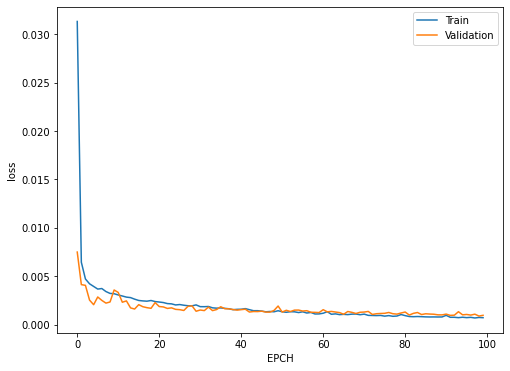

In [ ]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']
plt.plot(loss,label='Train')
plt.plot(val_loss,label='Validation')
plt.legend()
plt.xlabel('EPCH')
plt.ylabel('loss')

In [ ]:
# find best shuffeling for 1d

df_bw = pd.read_excel("D:\\hassan sharifi\\milad's project\\img_b\\data_bw.xlsx")
orig_df_bw = df_bw.copy()
target_bw = df_bw.pop('log(NMR_PERM)').values
index_bw = df_bw.pop('index')
features_bw = df_bw
feat_num_bw = features_bw.values.reshape(features_bw.values.shape[0],features_bw.values.shape[1],1)
ybw = target_bw.reshape(-1,1)

r2_list = []
state_list = []
for i in range(10):
    xtr_num,xts_num,ytr,yts = tts(feat_num,Target,train_size=0.7,random_state=i,shuffle=True)
    num_shape = xtr_num.shape[1:]
    inputs = Input(shape= num_shape)
    ###################
    con1_1 = Conv1D(16,1,padding = 'same', activation = 'relu')(inputs)
    con1_2 = Conv1D(64,1,padding = 'same', activation = 'relu')(con1_1)
    con1_3 = Conv1D(16,3,padding = 'same', activation = 'relu')(con1_2)
    ###################
    con2_1 = Conv1D(16,1,padding = 'same', activation = 'relu')(con1_3)
    con2_2 = Conv1D(64,1,padding = 'same', activation = 'relu')(con2_1)
    con2_3 = Conv1D(16,3,padding = 'same', activation = 'relu')(con2_2)
    ###################
    conc1 = concatenate([con2_3,inputs])
    ###################
    fltn = Flatten()(conc1)
    dnse = Dense(20,activation='relu')(fltn)
    out = Dense(1)(dnse)
    model = Model(inputs,out)
    lr = 0.001
    model.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=lr),metrics=['mse','mae'])
    hist = model.fit(xtr_num,ytr,
                 epochs=500,validation_split=0.2,verbose=0,
                 callbacks = [ES(monitor='val_loss', patience=20,
                                 restore_best_weights=True)])
    ybw_pred = model.predict(feat_num_bw)
    r2 = R2(ybw.reshape(-1,1),ybw_pred)
    print(r2)
    r2_list.append(r2)
    state_list.append(i)

0.9166214911877819
0.8802804866320473
0.9047571388233643
0.8207827741010696
0.8916666221145525
0.8780124502264633
0.8547722326385703
0.8936505808604884
0.8769180933769449
0.8303267124153649


In [ ]:
# find best shuffeling for 2d

df_bw = pd.read_excel("D:\\hassan sharifi\\milad's project\\img_b\\data_bw.xlsx")
orig_df_bw = df_bw.copy()
target_bw = df_bw.pop('log(NMR_PERM)').values
index_bw = df_bw.pop('index')
features_bw = df_bw
feat_num_bw = features_bw.values.reshape(features_bw.values.shape[0],features_bw.values.shape[1],1)
ybw = target_bw.reshape(-1,1)

feat_img_bw = []
for i in feat_num_bw:
    A,B = np.meshgrid(i,i)
    Z = A*B
    Z = Z.reshape(Z.shape[0],Z.shape[1],1)
    feat_img_bw.append(Z)
feat_img_bw = np.array(feat_img_bw)

r2_list = []
state_list = []
for i in range(10):
    xtr_img,xts_img,ytr,yts = tts(feat_img,Target,train_size=0.7,random_state=i,shuffle=True)
    num_shape = xtr_img.shape[1:]
    inputs = Input(shape= num_shape)
    ###################
    con1_1 = Conv1D(16,1,padding = 'same', activation = 'relu')(inputs)
    con1_2 = Conv1D(64,1,padding = 'same', activation = 'relu')(con1_1)
    con1_3 = Conv1D(16,3,padding = 'same', activation = 'relu')(con1_2)
    ###################
    con2_1 = Conv1D(16,1,padding = 'same', activation = 'relu')(con1_3)
    con2_2 = Conv1D(64,1,padding = 'same', activation = 'relu')(con2_1)
    con2_3 = Conv1D(16,3,padding = 'same', activation = 'relu')(con2_2)
    ###################
    conc1 = concatenate([con2_3,inputs])
    ###################
    fltn = Flatten()(conc1)
    dnse = Dense(20,activation='relu')(fltn)
    out = Dense(1)(dnse)
    model = Model(inputs,out)
    lr = 0.001
    model.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=lr),metrics=['mse','mae'])
    hist = model.fit(xtr_img,ytr,
                 epochs=500,validation_split=0.2,verbose=0,
                 callbacks = [ES(monitor='val_loss', patience=20,
                                 restore_best_weights=True)])
    ybw_pred = model.predict(feat_img_bw)
    r2 = R2(ybw.reshape(-1,1),ybw_pred)
    r2_list.append(r2)
    print(r2)
    state_list.append(i)

0.7924980996049759
0.8694876370363384
0.8504147133470203
0.7859225657516306
0.8093538982311032
0.8639230547986143
0.8625941643629651
0.8813309036306223
0.8555663108339373
0.8153587349797622


# Model Evaluation

**Train and Test datasets on img data**

(-0.468156916181989, 0.27046307110026246)

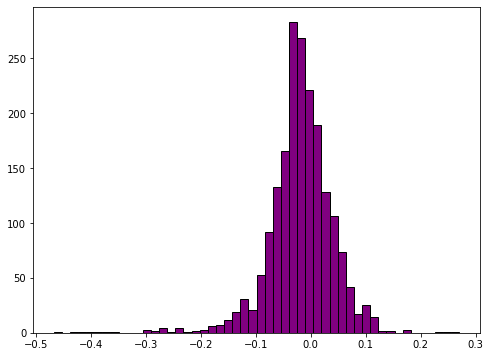

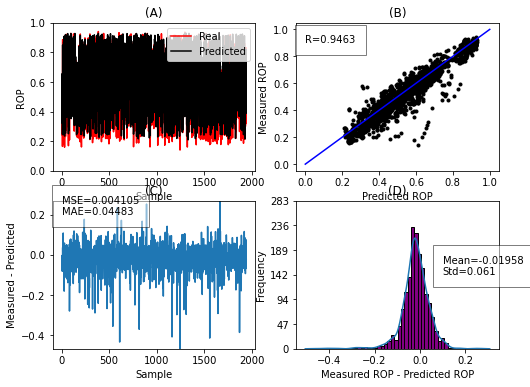

In [ ]:
# on test set
yts_pred = model.predict(xts_img)

diff_ts = (yts-yts_pred)
mu_ts = diff_ts.mean().astype('float16')
alpha_ts = diff_ts.std().astype('float16')
mse_ts = MSE(yts,yts_pred).astype('float16')
rmse_ts = (mse_ts**0.5).astype('float16')
r2_ts = R2(yts_pred,yts).astype('float16')
mae_ts = MAE(yts,yts_pred).astype('float16')
mape_ts = MAPE(yts,yts_pred).astype('float16')


a = plt.hist(diff_ts,bins=50,edgecolor='k',color='purple')[0]
mn, mx = plt.xlim()

fig,axis = plt.subplots(2,2)

#1
axis[0][0].plot(yts,'r',label='Real')
axis[0][0].plot(yts_pred,'k',label='Predicted')
axis[0][0].set_xlabel('Sample')
axis[0][0].set_ylabel('ROP')
axis[0][0].set_title('(A)')
axis[0][0].set_ylim([0,1])
axis[0][0].legend(loc="upper right")

#2
axis[0][1].plot(yts_pred,yts,'.k')
axis[0][1].plot([0,1],[0,1],'b')
axis[0][1].set_xlabel('Predicted ROP')
axis[0][1].set_ylabel('Measured ROP')
axis[0][1].set_title('(B)')
axis[0][1].text(0, 0.9, 'R='+str(r2_ts),bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10},
        color='k')

#3
axis[1][1].hist(diff_ts,bins=50,edgecolor='k',color='purple',density=True)
kde_xs = np.linspace(mn, mx,300)
kde = st.gaussian_kde(diff_ts.reshape(diff_ts.shape[0],))
axis[1][1].plot(kde_xs, kde.pdf(kde_xs))
axis[1][1].set_xlabel('Measured ROP - Predicted ROP')
axis[1][1].set_ylabel('Frequency')
axis[1][1].set_title('(D)' )
axis[1][1].text(0.1, 6, 'Mean=' +str(mu_ts)+'\nStd='+str(alpha_ts) ,bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10},
        color='k')
ticks = plt.yticks()
n = len(ticks[0])
min_ = a.min()
max_ = a.max()
rang = np.linspace(min_,max_,n)
str_ticks = [str(round(i)) for i in rang]
plt.yticks(ticks[0],str_ticks)

#4
axis[1][0].plot(diff_ts)
axis[1][0].set_xlabel('Sample')
axis[1][0].set_ylabel('Measured - Predicted')
axis[1][0].set_title('(C)')
axis[1][0].text(0, 0.2, 'MSE=' +str(mse_ts)+'\nMAE='+str(mae_ts) ,bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10},
        color='k')
axis[1][0].set_ylim([diff_ts.min(),diff_ts.max()])

**Train and Test datasets on num data**

(-0.44690380720371753, 0.2625259973926819)

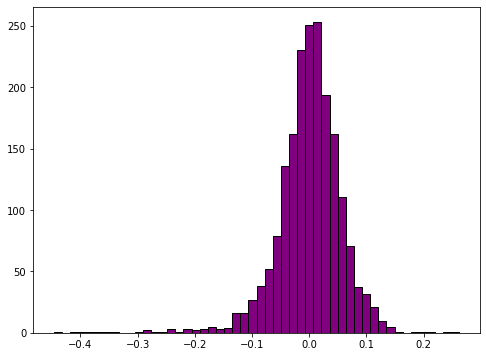

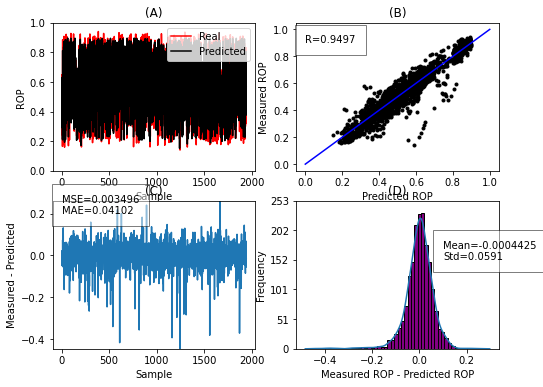

In [ ]:
# on test set
yts_pred = model.predict(xts_num)

diff_ts = (yts-yts_pred)
mu_ts = diff_ts.mean().astype('float16')
alpha_ts = diff_ts.std().astype('float16')
mse_ts = MSE(yts,yts_pred).astype('float16')
rmse_ts = (mse_ts**0.5).astype('float16')
r2_ts = R2(yts_pred,yts).astype('float16')
mae_ts = MAE(yts,yts_pred).astype('float16')
mape_ts = MAPE(yts,yts_pred).astype('float16')


a = plt.hist(diff_ts,bins=50,edgecolor='k',color='purple')[0]
mn, mx = plt.xlim()

fig,axis = plt.subplots(2,2)

#1
axis[0][0].plot(yts,'r',label='Real')
axis[0][0].plot(yts_pred,'k',label='Predicted')
axis[0][0].set_xlabel('Sample')
axis[0][0].set_ylabel('ROP')
axis[0][0].set_title('(A)')
axis[0][0].set_ylim([0,1])
axis[0][0].legend(loc="upper right")

#2
axis[0][1].plot(yts_pred,yts,'.k')
axis[0][1].plot([0,1],[0,1],'b')
axis[0][1].set_xlabel('Predicted ROP')
axis[0][1].set_ylabel('Measured ROP')
axis[0][1].set_title('(B)')
axis[0][1].text(0, 0.9, 'R='+str(r2_ts),bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10},
        color='k')

#3
axis[1][1].hist(diff_ts,bins=50,edgecolor='k',color='purple',density=True)
kde_xs = np.linspace(mn, mx,300)
kde = st.gaussian_kde(diff_ts.reshape(diff_ts.shape[0],))
axis[1][1].plot(kde_xs, kde.pdf(kde_xs))
axis[1][1].set_xlabel('Measured ROP - Predicted ROP')
axis[1][1].set_ylabel('Frequency')
axis[1][1].set_title('(D)' )
axis[1][1].text(0.1, 6, 'Mean=' +str(mu_ts)+'\nStd='+str(alpha_ts) ,bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10},
        color='k')
ticks = plt.yticks()
n = len(ticks[0])
min_ = a.min()
max_ = a.max()
rang = np.linspace(min_,max_,n)
str_ticks = [str(round(i)) for i in rang]
plt.yticks(ticks[0],str_ticks)

#4
axis[1][0].plot(diff_ts)
axis[1][0].set_xlabel('Sample')
axis[1][0].set_ylabel('Measured - Predicted')
axis[1][0].set_title('(C)')
axis[1][0].text(0, 0.2, 'MSE=' +str(mse_ts)+'\nMAE='+str(mae_ts) ,bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10},
        color='k')
axis[1][0].set_ylim([diff_ts.min(),diff_ts.max()])

(-0.446431577307995, 0.26618149487884424)

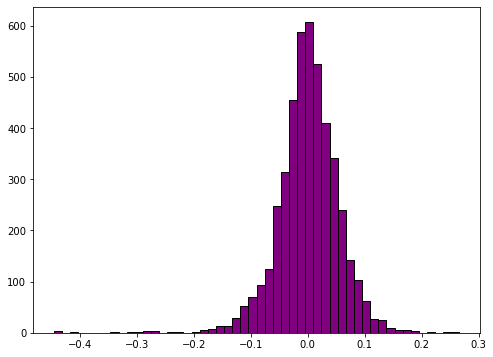

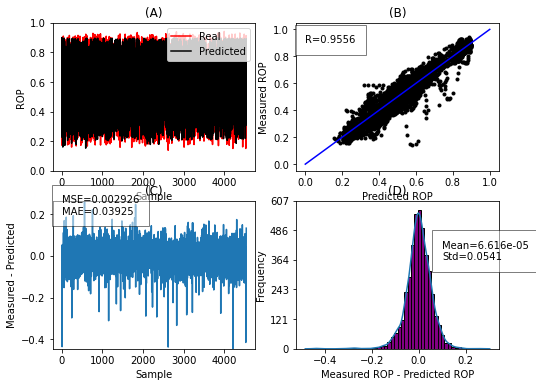

In [ ]:
# on train set
ytr_pred = model.predict(xtr_num)

diff_tr = (ytr-ytr_pred)
mu_tr = diff_tr.mean().astype('float16')
alpha_tr = diff_tr.std().astype('float16')
mse_tr = MSE(ytr,ytr_pred).astype('float16')
rmse_tr = (mse_tr**0.5).astype('float16')
r2_tr = R2(ytr_pred,ytr).astype('float16')
mae_tr = MAE(ytr,ytr_pred).astype('float16')
mape_tr = MAPE(ytr,ytr_pred).astype('float16')


a = plt.hist(diff_tr,bins=50,edgecolor='k',color='purple')[0]
mn, mx = plt.xlim()

fig,axis = plt.subplots(2,2)

#1
axis[0][0].plot(ytr,'r',label='Real')
axis[0][0].plot(ytr_pred,'k',label='Predicted')
axis[0][0].set_xlabel('Sample')
axis[0][0].set_ylabel('ROP')
axis[0][0].set_title('(A)')
axis[0][0].set_ylim([0,1])
axis[0][0].legend(loc="upper right")

#2
axis[0][1].plot(ytr_pred,ytr,'.k')
axis[0][1].plot([0,1],[0,1],'b')
axis[0][1].set_xlabel('Predicted ROP')
axis[0][1].set_ylabel('Measured ROP')
axis[0][1].set_title('(B)')
axis[0][1].text(0, 0.9, 'R='+str(r2_tr),bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10},
        color='k')

#3
axis[1][1].hist(diff_tr,bins=50,edgecolor='k',color='purple',density=True)
kde_xs = np.linspace(mn, mx,300)
kde = st.gaussian_kde(diff_tr.reshape(diff_tr.shape[0],))
axis[1][1].plot(kde_xs, kde.pdf(kde_xs))
axis[1][1].set_xlabel('Measured ROP - Predicted ROP')
axis[1][1].set_ylabel('Frequency')
axis[1][1].set_title('(D)' )
axis[1][1].text(0.1, 6, 'Mean=' +str(mu_tr)+'\nStd='+str(alpha_tr) ,bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10},
        color='k')
ticks = plt.yticks()
n = len(ticks[0])
min_ = a.min()
max_ = a.max()
rang = np.linspace(min_,max_,n)
str_ticks = [str(round(i)) for i in rang]
plt.yticks(ticks[0],str_ticks)

#4
axis[1][0].plot(diff_tr)
axis[1][0].set_xlabel('Sample')
axis[1][0].set_ylabel('Measured - Predicted')
axis[1][0].set_title('(C)')
axis[1][0].text(0, 0.2, 'MSE=' +str(mse_tr)+'\nMAE='+str(mae_tr) ,bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10},
        color='k')
axis[1][0].set_ylim([diff_tr.min(),diff_tr.max()])

**Train and Test datasets on mixed data**

(-0.13108887629149302, 0.12649550974458168)

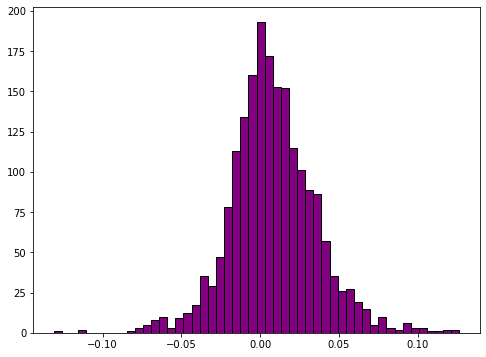

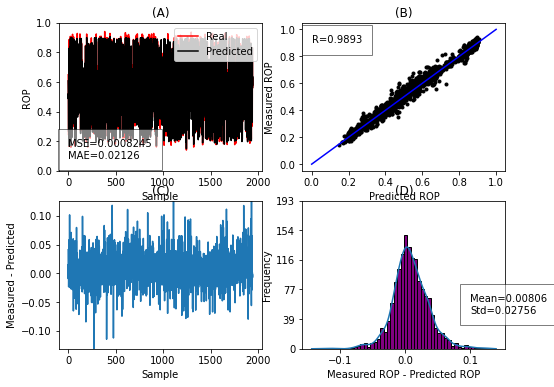

In [ ]:
# on test set
yts_pred = model.predict([xts_num,xts_img])

diff_ts = (yts-yts_pred)
mu_ts = diff_ts.mean().astype('float16')
alpha_ts = diff_ts.std().astype('float16')
mse_ts = MSE(yts,yts_pred).astype('float16')
rmse_ts = (mse_ts**0.5).astype('float16')
r2_ts = R2(yts_pred,yts).astype('float16')
mae_ts = MAE(yts,yts_pred).astype('float16')
mape_ts = MAPE(yts,yts_pred).astype('float16')


a = plt.hist(diff_ts,bins=50,edgecolor='k',color='purple')[0]
mn, mx = plt.xlim()

fig,axis = plt.subplots(2,2)

#1
axis[0][0].plot(yts,'r',label='Real')
axis[0][0].plot(yts_pred,'k',label='Predicted')
axis[0][0].set_xlabel('Sample')
axis[0][0].set_ylabel('ROP')
axis[0][0].set_title('(A)')
axis[0][0].set_ylim([0,1])
axis[0][0].legend(loc="upper right")

#2
axis[0][1].plot(yts_pred,yts,'.k')
axis[0][1].plot([0,1],[0,1],'b')
axis[0][1].set_xlabel('Predicted ROP')
axis[0][1].set_ylabel('Measured ROP')
axis[0][1].set_title('(B)')
axis[0][1].text(0, 0.9, 'R='+str(r2_ts),bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10},
        color='k')

#3
axis[1][1].hist(diff_ts,bins=50,edgecolor='k',color='purple',density=True)
kde_xs = np.linspace(mn, mx,300)
kde = st.gaussian_kde(diff_ts.reshape(diff_ts.shape[0],))
axis[1][1].plot(kde_xs, kde.pdf(kde_xs))
axis[1][1].set_xlabel('Measured ROP - Predicted ROP')
axis[1][1].set_ylabel('Frequency')
axis[1][1].set_title('(D)' )
axis[1][1].text(0.1, 6, 'Mean=' +str(mu_ts)+'\nStd='+str(alpha_ts) ,bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10},
        color='k')
ticks = plt.yticks()
n = len(ticks[0])
min_ = a.min()
max_ = a.max()
rang = np.linspace(min_,max_,n)
str_ticks = [str(round(i)) for i in rang]
plt.yticks(ticks[0],str_ticks)

#4
axis[1][0].plot(diff_ts)
axis[1][0].set_xlabel('Sample')
axis[1][0].set_ylabel('Measured - Predicted')
axis[1][0].set_title('(C)')
axis[1][0].text(0, 0.2, 'MSE=' +str(mse_ts)+'\nMAE='+str(mae_ts) ,bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10},
        color='k')
axis[1][0].set_ylim([diff_ts.min(),diff_ts.max()])

(-0.1401250029577099, 0.14459489774567513)

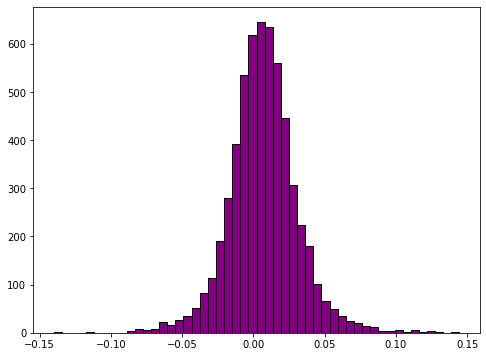

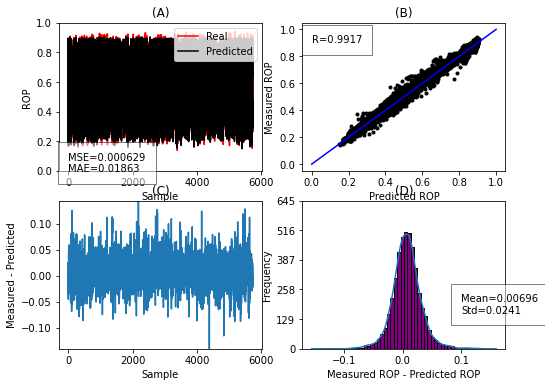

In [ ]:
# on train set
ytr_pred = model.predict([xtr_num,xtr_img])

diff_tr = (ytr-ytr_pred)
mu_tr = diff_tr.mean().astype('float16')
alpha_tr = diff_tr.std().astype('float16')
mse_tr = MSE(ytr,ytr_pred).astype('float16')
rmse_tr = (mse_tr**0.5).astype('float16')
r2_tr = R2(ytr_pred,ytr).astype('float16')
mae_tr = MAE(ytr,ytr_pred).astype('float16')
mape_tr = MAPE(ytr,ytr_pred).astype('float16')


a = plt.hist(diff_tr,bins=50,edgecolor='k',color='purple')[0]
mn, mx = plt.xlim()

fig,axis = plt.subplots(2,2)

#1
axis[0][0].plot(ytr,'r',label='Real')
axis[0][0].plot(ytr_pred,'k',label='Predicted')
axis[0][0].set_xlabel('Sample')
axis[0][0].set_ylabel('ROP')
axis[0][0].set_title('(A)')
axis[0][0].set_ylim([0,1])
axis[0][0].legend(loc="upper right")

#2
axis[0][1].plot(ytr_pred,ytr,'.k')
axis[0][1].plot([0,1],[0,1],'b')
axis[0][1].set_xlabel('Predicted ROP')
axis[0][1].set_ylabel('Measured ROP')
axis[0][1].set_title('(B)')
axis[0][1].text(0, 0.9, 'R='+str(r2_tr),bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10},
        color='k')

#3
axis[1][1].hist(diff_tr,bins=50,edgecolor='k',color='purple',density=True)
kde_xs = np.linspace(mn, mx,300)
kde = st.gaussian_kde(diff_tr.reshape(diff_tr.shape[0],))
axis[1][1].plot(kde_xs, kde.pdf(kde_xs))
axis[1][1].set_xlabel('Measured ROP - Predicted ROP')
axis[1][1].set_ylabel('Frequency')
axis[1][1].set_title('(D)' )
axis[1][1].text(0.1, 6, 'Mean=' +str(mu_tr)+'\nStd='+str(alpha_tr) ,bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10},
        color='k')
ticks = plt.yticks()
n = len(ticks[0])
min_ = a.min()
max_ = a.max()
rang = np.linspace(min_,max_,n)
str_ticks = [str(round(i)) for i in rang]
plt.yticks(ticks[0],str_ticks)

#4
axis[1][0].plot(diff_tr)
axis[1][0].set_xlabel('Sample')
axis[1][0].set_ylabel('Measured - Predicted')
axis[1][0].set_title('(C)')
axis[1][0].text(0, 0.2, 'MSE=' +str(mse_tr)+'\nMAE='+str(mae_tr) ,bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10},
        color='k')
axis[1][0].set_ylim([diff_tr.min(),diff_tr.max()])

**blind dataset**

In [ ]:
df_bw = pd.read_excel("D:\\hassan sharifi\\milad's project\\img_b\\data_bw.xlsx")
orig_df_bw = df_bw.copy()
df_bw

,index,CGR,NPHI,PEF,RESD,RESX,RHOB,SGR,log(NMR_PERM)
0,0,0.169355,0.275185,0.603290,0.358444,0.494000,0.503922,0.151025,0.624142
1,1,0.177758,0.279660,0.603561,0.351080,0.490961,0.496511,0.152631,0.624891
2,2,0.201791,0.305595,0.601401,0.336133,0.469396,0.483760,0.167486,0.610773
3,3,0.192143,0.322710,0.597857,0.332302,0.449326,0.479553,0.156186,0.636303
4,4,0.193589,0.327439,0.594776,0.336675,0.452110,0.485374,0.158116,0.657730
...,...,...,...,...,...,...,...,...,...
3986,3986,0.231449,0.021246,0.707459,0.691866,0.810585,0.767973,0.265253,0.439592
3987,3987,0.230531,0.031762,0.707242,0.651921,0.636860,0.767021,0.269853,0.473216
3988,3988,0.224254,0.067631,0.680304,0.619676,0.469571,0.752310,0.272525,0.246602
3989,3989,0.224297,0.149730,0.639783,0.653820,0.441691,0.730831,0.278252,0.497955


In [ ]:
target_bw = df_bw.pop('log(NMR_PERM)').values
target_bw_s = sg(target_bw,51,3)
target_bw = target_bw_s
index_bw = df_bw.pop('index')
features_bw = df_bw
features_bw['CGR'] = sg(features_bw['CGR'].values,31,3)
features_bw['NPHI'] = sg(features_bw['NPHI'].values,31,3)
features_bw['PEF'] = sg(features_bw['PEF'].values,31,3)
features_bw['RESD'] = sg(features_bw['RESD'].values,31,3)
features_bw['RESX'] = sg(features_bw['RESX'].values,31,3)
features_bw['RHOB'] = sg(features_bw['RHOB'].values,31,3)
features_bw['SGR'] = sg(features_bw['SGR'].values,31,3)

In [ ]:
feat_num_bw = features_bw.values.reshape(features_bw.values.shape[0],features_bw.values.shape[1],1)
ybw = target_bw.reshape(-1,1)

(3991, 7, 7, 1)
No. of Samples: 3991
Sample Shape: (7, 7, 1)
features shape: (3991, 7, 7, 1)
target shape: (3991, 1)


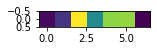

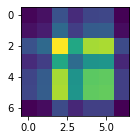

In [ ]:
feat_img_bw = []
for i in feat_num_bw:
    A,B = np.meshgrid(i,i)
    Z = A*B
    Z = Z.reshape(Z.shape[0],Z.shape[1],1)
    feat_img_bw.append(Z)
feat_img_bw = np.array(feat_img_bw)
plt.figure(figsize=(2,2))
plt.imshow(feat_num_bw[0].reshape(1,feat_num_bw[0].shape[0]))
plt.figure(figsize=(2,2))
plt.imshow(feat_img_bw[0]);
print(feat_img_bw.shape)
shape = feat_img_bw[0].shape
print('No. of Samples:',len(feat_img_bw))
print('Sample Shape:',feat_img_bw[0].shape)
print('features shape:',feat_img_bw.shape)
print('target shape:',ybw.shape)

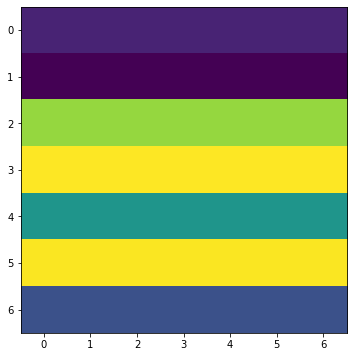

In [ ]:
plt.imshow(B)

R2=  0.9452322779534363
MSE=  0.004367948982093547
RMSE=  0.06609046059828565


Text(0, 0.5, 'Value')

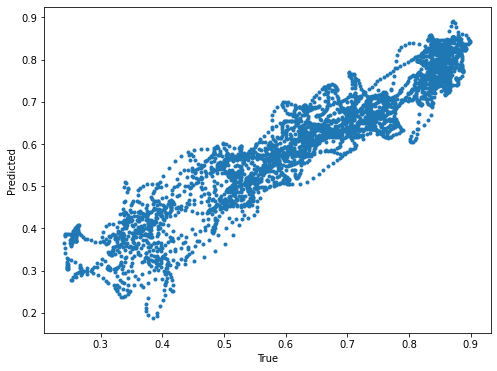

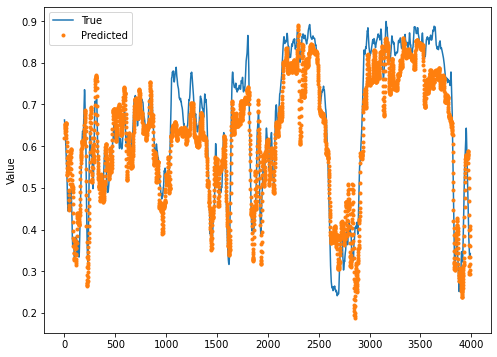

In [ ]:
# img
ybw_pred = model.predict(feat_img_bw)
r2_tr = R2(ybw.reshape(-1,1),ybw_pred)
print('R2= ',r2_tr)
mse_tr = MSE(ybw,ybw_pred)
rmse_tr = mse_tr**0.5
print('MSE= ',mse_tr)
print('RMSE= ',rmse_tr)
plt.figure()
plt.plot(ybw,ybw_pred,'.')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.figure()
plt.plot(ybw,label='True')
plt.plot(ybw_pred,'.',label='Predicted')
plt.legend()
plt.ylabel('Value')

R2=  0.9317534738735122
MSE=  0.007399586488572234
RMSE=  0.0860208491504951


Text(0, 0.5, 'Value')

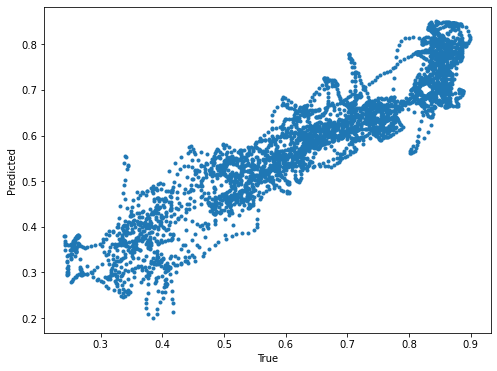

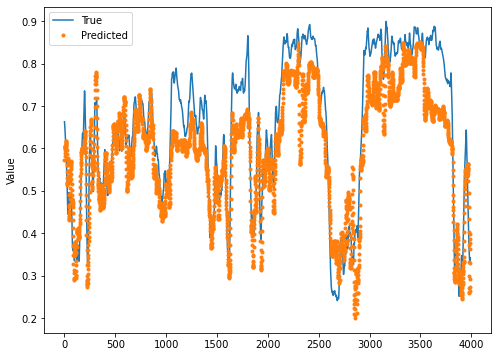

In [ ]:
# num
ybw_pred = model.predict(feat_num_bw)
r2_tr = R2(ybw.reshape(-1,1),ybw_pred)
print('R2= ',r2_tr)
mse_tr = MSE(ybw,ybw_pred)
rmse_tr = mse_tr**0.5
print('MSE= ',mse_tr)
print('RMSE= ',rmse_tr)
plt.figure()
plt.plot(ybw,ybw_pred,'.')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.figure()
plt.plot(ybw,label='True')
plt.plot(ybw_pred,'.',label='Predicted')
plt.legend()
plt.ylabel('Value')

R2=  0.984678339654003
MSE=  0.0009745877641895921
RMSE=  0.031218388238177706


Text(0, 0.5, 'Value')

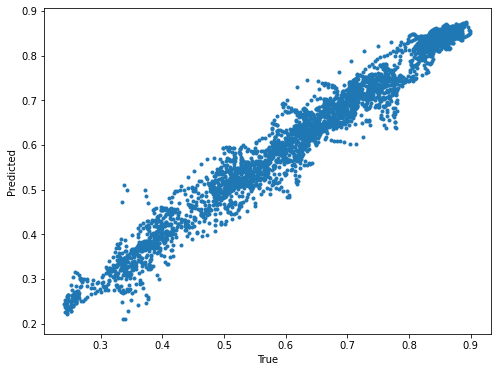

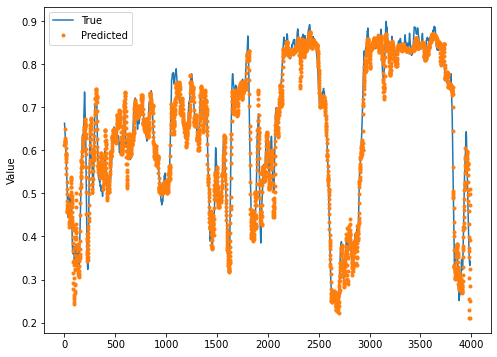

In [ ]:
# mixed
ybw_pred = model.predict([feat_num_bw,feat_img_bw])
r2_tr = R2(ybw.reshape(-1,1),ybw_pred)
print('R2= ',r2_tr)
mse_tr = MSE(ybw,ybw_pred)
rmse_tr = mse_tr**0.5
print('MSE= ',mse_tr)
print('RMSE= ',rmse_tr)
plt.figure()
plt.plot(ybw,ybw_pred,'.')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.figure()
plt.plot(ybw,label='True')
plt.plot(ybw_pred,'.',label='Predicted')
plt.legend()
plt.ylabel('Value')

(-0.271054787107591, 0.3008788473782972)

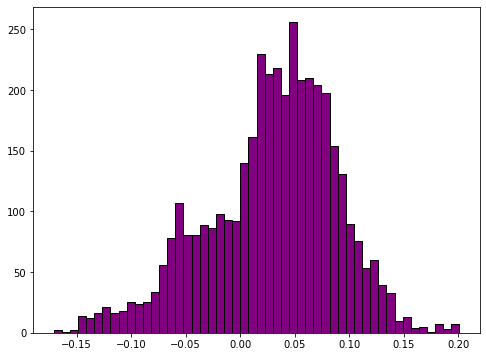

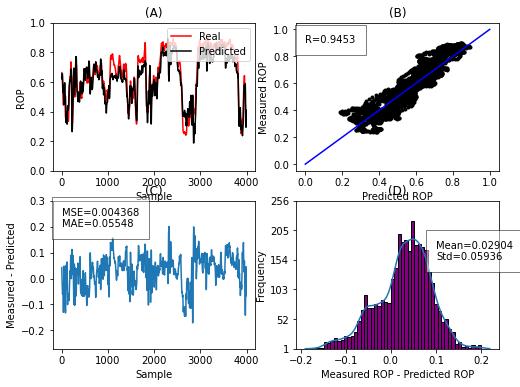

In [ ]:
# on bwain set img
ybw_pred = model.predict(feat_img_bw)

diff_bw = (ybw-ybw_pred)
mu_bw = diff_bw.mean().astype('float16')
alpha_bw = diff_bw.std().astype('float16')
mse_bw = MSE(ybw,ybw_pred).astype('float16')
rmse_bw = (mse_bw**0.5).astype('float16')
r2_bw = R2(ybw_pred,ybw).astype('float16')
mae_bw = MAE(ybw,ybw_pred).astype('float16')
mape_bw = MAPE(ybw,ybw_pred).astype('float16')


a = plt.hist(diff_bw,bins=50,edgecolor='k',color='purple')[0]
mn, mx = plt.xlim()

fig,axis = plt.subplots(2,2)

#1
axis[0][0].plot(ybw,'r',label='Real')
axis[0][0].plot(ybw_pred,'k',label='Predicted')
axis[0][0].set_xlabel('Sample')
axis[0][0].set_ylabel('ROP')
axis[0][0].set_title('(A)')
axis[0][0].set_ylim([0,1])
axis[0][0].legend(loc="upper right")

#2
axis[0][1].plot(ybw_pred,ybw,'.k')
axis[0][1].plot([0,1],[0,1],'b')
axis[0][1].set_xlabel('Predicted ROP')
axis[0][1].set_ylabel('Measured ROP')
axis[0][1].set_title('(B)')
axis[0][1].text(0, 0.9, 'R='+str(r2_bw),bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10},
        color='k')

#3
axis[1][1].hist(diff_bw,bins=50,edgecolor='k',color='purple',density=True)
kde_xs = np.linspace(mn, mx,300)
kde = st.gaussian_kde(diff_bw.reshape(diff_bw.shape[0],))
axis[1][1].plot(kde_xs, kde.pdf(kde_xs))
axis[1][1].set_xlabel('Measured ROP - Predicted ROP')
axis[1][1].set_ylabel('Frequency')
axis[1][1].set_title('(D)' )
axis[1][1].text(0.1, 6, 'Mean=' +str(mu_bw)+'\nStd='+str(alpha_bw) ,bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10},
        color='k')
ticks = plt.yticks()
n = len(ticks[0])
min_ = a.min()
max_ = a.max()
rang = np.linspace(min_,max_,n)
str_ticks = [str(round(i)) for i in rang]
plt.yticks(ticks[0],str_ticks)

#4
axis[1][0].plot(diff_bw)
axis[1][0].set_xlabel('Sample')
axis[1][0].set_ylabel('Measured - Predicted')
axis[1][0].set_title('(C)')
axis[1][0].text(0, 0.2, 'MSE=' +str(mse_bw)+'\nMAE='+str(mae_bw) ,bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10},
        color='k')
axis[1][0].set_ylim([diff_bw.min()-0.1,diff_bw.max()+0.1])

(-0.31696884102452216, 0.342881234029607)

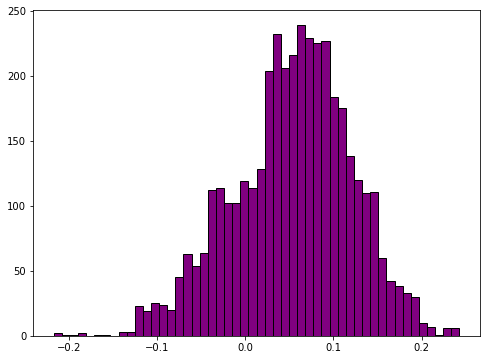

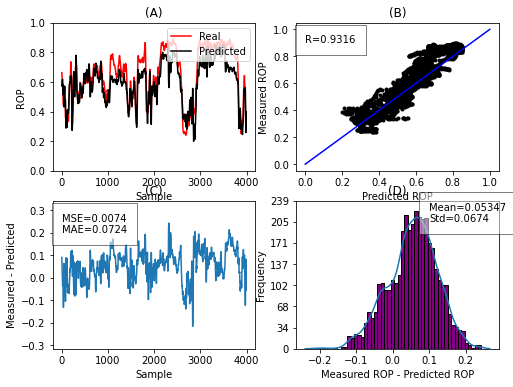

In [ ]:
# on bwain set num
ybw_pred = model.predict(feat_num_bw)

diff_bw = (ybw-ybw_pred)
mu_bw = diff_bw.mean().astype('float16')
alpha_bw = diff_bw.std().astype('float16')
mse_bw = MSE(ybw,ybw_pred).astype('float16')
rmse_bw = (mse_bw**0.5).astype('float16')
r2_bw = R2(ybw_pred,ybw).astype('float16')
mae_bw = MAE(ybw,ybw_pred).astype('float16')
mape_bw = MAPE(ybw,ybw_pred).astype('float16')


a = plt.hist(diff_bw,bins=50,edgecolor='k',color='purple')[0]
mn, mx = plt.xlim()

fig,axis = plt.subplots(2,2)

#1
axis[0][0].plot(ybw,'r',label='Real')
axis[0][0].plot(ybw_pred,'k',label='Predicted')
axis[0][0].set_xlabel('Sample')
axis[0][0].set_ylabel('ROP')
axis[0][0].set_title('(A)')
axis[0][0].set_ylim([0,1])
axis[0][0].legend(loc="upper right")

#2
axis[0][1].plot(ybw_pred,ybw,'.k')
axis[0][1].plot([0,1],[0,1],'b')
axis[0][1].set_xlabel('Predicted ROP')
axis[0][1].set_ylabel('Measured ROP')
axis[0][1].set_title('(B)')
axis[0][1].text(0, 0.9, 'R='+str(r2_bw),bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10},
        color='k')

#3
axis[1][1].hist(diff_bw,bins=50,edgecolor='k',color='purple',density=True)
kde_xs = np.linspace(mn, mx,300)
kde = st.gaussian_kde(diff_bw.reshape(diff_bw.shape[0],))
axis[1][1].plot(kde_xs, kde.pdf(kde_xs))
axis[1][1].set_xlabel('Measured ROP - Predicted ROP')
axis[1][1].set_ylabel('Frequency')
axis[1][1].set_title('(D)' )
axis[1][1].text(0.1, 6, 'Mean=' +str(mu_bw)+'\nStd='+str(alpha_bw) ,bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10},
        color='k')
ticks = plt.yticks()
n = len(ticks[0])
min_ = a.min()
max_ = a.max()
rang = np.linspace(min_,max_,n)
str_ticks = [str(round(i)) for i in rang]
plt.yticks(ticks[0],str_ticks)

#4
axis[1][0].plot(diff_bw)
axis[1][0].set_xlabel('Sample')
axis[1][0].set_ylabel('Measured - Predicted')
axis[1][0].set_title('(C)')
axis[1][0].text(0, 0.2, 'MSE=' +str(mse_bw)+'\nMAE='+str(mae_bw) ,bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10},
        color='k')
axis[1][0].set_ylim([diff_bw.min()-0.1,diff_bw.max()+0.1])

(-0.27130805322925233, 0.24053904112855076)

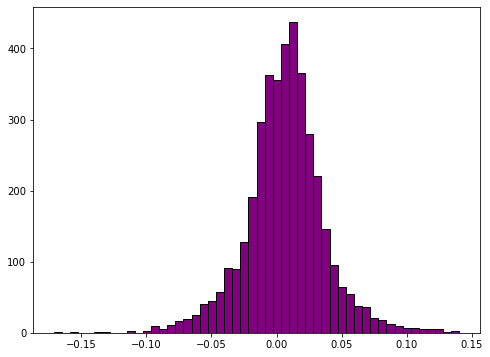

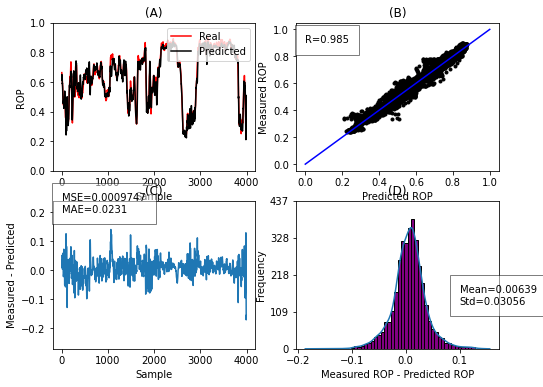

In [ ]:
# on bwain set mixed
ybw_pred = model.predict([feat_num_bw,feat_img_bw])

diff_bw = (ybw-ybw_pred)
mu_bw = diff_bw.mean().astype('float16')
alpha_bw = diff_bw.std().astype('float16')
mse_bw = MSE(ybw,ybw_pred).astype('float16')
rmse_bw = (mse_bw**0.5).astype('float16')
r2_bw = R2(ybw_pred,ybw).astype('float16')
mae_bw = MAE(ybw,ybw_pred).astype('float16')
mape_bw = MAPE(ybw,ybw_pred).astype('float16')


a = plt.hist(diff_bw,bins=50,edgecolor='k',color='purple')[0]
mn, mx = plt.xlim()

fig,axis = plt.subplots(2,2)

#1
axis[0][0].plot(ybw,'r',label='Real')
axis[0][0].plot(ybw_pred,'k',label='Predicted')
axis[0][0].set_xlabel('Sample')
axis[0][0].set_ylabel('ROP')
axis[0][0].set_title('(A)')
axis[0][0].set_ylim([0,1])
axis[0][0].legend(loc="upper right")

#2
axis[0][1].plot(ybw_pred,ybw,'.k')
axis[0][1].plot([0,1],[0,1],'b')
axis[0][1].set_xlabel('Predicted ROP')
axis[0][1].set_ylabel('Measured ROP')
axis[0][1].set_title('(B)')
axis[0][1].text(0, 0.9, 'R='+str(r2_bw),bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10},
        color='k')

#3
axis[1][1].hist(diff_bw,bins=50,edgecolor='k',color='purple',density=True)
kde_xs = np.linspace(mn, mx,300)
kde = st.gaussian_kde(diff_bw.reshape(diff_bw.shape[0],))
axis[1][1].plot(kde_xs, kde.pdf(kde_xs))
axis[1][1].set_xlabel('Measured ROP - Predicted ROP')
axis[1][1].set_ylabel('Frequency')
axis[1][1].set_title('(D)' )
axis[1][1].text(0.1, 6, 'Mean=' +str(mu_bw)+'\nStd='+str(alpha_bw) ,bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10},
        color='k')
ticks = plt.yticks()
n = len(ticks[0])
min_ = a.min()
max_ = a.max()
rang = np.linspace(min_,max_,n)
str_ticks = [str(round(i)) for i in rang]
plt.yticks(ticks[0],str_ticks)

#4
axis[1][0].plot(diff_bw)
axis[1][0].set_xlabel('Sample')
axis[1][0].set_ylabel('Measured - Predicted')
axis[1][0].set_title('(C)')
axis[1][0].text(0, 0.2, 'MSE=' +str(mse_bw)+'\nMAE='+str(mae_bw) ,bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10},
        color='k')
axis[1][0].set_ylim([diff_bw.min()-0.1,diff_bw.max()+0.1])

Text(0.5, 0.92, 'Shaded')

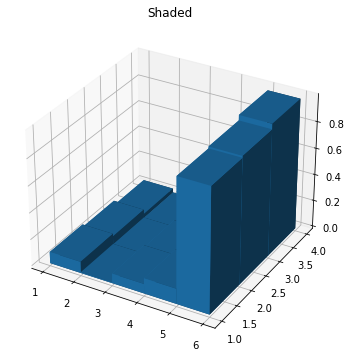

In [ ]:
# 3d bar plot

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

_x = [1,2,3,4,5] # perf params [RMSE, MSE , MAE, MAPE, R]
_y = [1,2,3]  # model [1d , 2d , multi]
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()
top = np.array([0.086,0.0074,0.0724,0.1147,0.9316
,0.0661,0.0043,0.0554,0.095,0.9453,
0.0312,0.0009,0.0231,0.0399,0.985]) # performance
bottom = np.zeros_like(top)
width = depth = 1
ax1.bar3d(x, y, bottom, width, depth, top, shade=True)
ax1.set_title('Shaded')


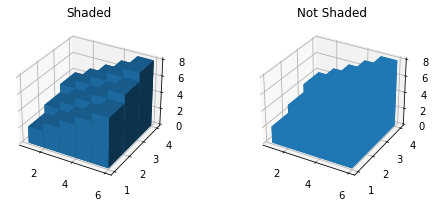

In [ ]:
# setup the figure and axes
fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# fake data
_x = [1,2,3,4,5] # perf params [RMSE, MSE , MAE, MAPE, R]
_y = [1,2,3] # mdeol [1d , 2d , multi]
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

top = x + y
bottom = np.zeros_like(top)
width = depth = 1

ax1.bar3d(x, y, bottom, width, depth, top, shade=True)
ax1.set_title('Shaded')

ax2.bar3d(x, y, bottom, width, depth, top, shade=False)
ax2.set_title('Not Shaded')

plt.show()